In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

cwd = os.getcwd()
print(cwd)

c:\Users\miram\OneDrive - Cornell University\research\plandb.sioslab.com\utils\pointing code


124.06
124.85
125.64
126.43
127.21
127.98
128.75
129.51
130.26
131.01
131.75
132.48
133.21
133.92
134.63
135.32
136.01
136.69
137.35
138.01
138.65
139.28
139.89
140.49
141.08
141.65
142.21
142.75
143.27
143.77
144.26
144.72
145.17
145.59
145.99
146.37
146.73
147.06
147.36
147.64
147.9
148.12
148.32
148.49
148.64
148.75
148.83
148.89
148.91
148.91
148.88
148.81
148.72
148.6
148.45
148.27
148.07
147.84
147.58
147.3
146.99
146.66
146.3
145.92
145.52
145.1
144.66
144.19
143.71
143.22
142.7
142.17
141.62
141.06
140.49
139.9
139.29
138.68
138.05
137.42
136.77
136.11
135.44
134.77
134.08
133.39
132.69
131.98
131.26
130.54
129.81
129.08
128.34
127.59
126.84
126.09
125.33
124.56
123.79
123.02
122.24
121.46
120.68
119.89
119.1
118.31
117.52
116.72
115.92
115.12
114.32
113.51
112.7
111.89
111.08
110.27
109.46
108.64
107.82
107.01
106.19
105.37
104.55
103.73
102.9
102.08
101.26
100.43
99.61
98.78
97.96
97.13
96.31
95.48
94.66
93.83
93.01
92.18
91.36
90.53
89.71
88.88
88.06
87.24
86.41
85.59
84.77


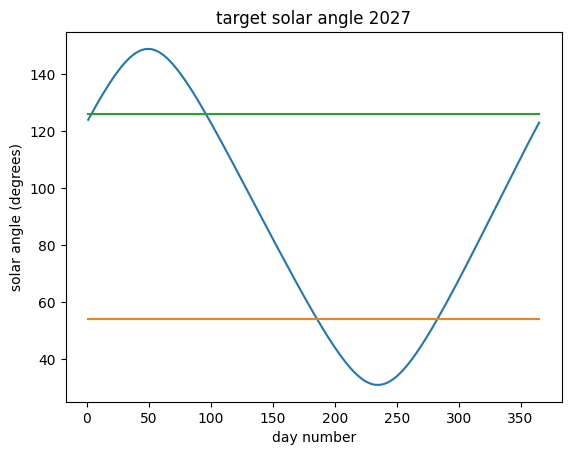

In [9]:
# plot target pitch
tgt = pd.read_csv(cwd + "\\csv (for reference)\\" + "tgt_data.csv")
tgt_s = tgt["sun angle"]
ndays = 365
sol_angs = []
inv_day = []
for n in range(ndays):  # loop thru each day
    sol_angs.append(tgt_s[n])
    print(tgt_s[n])
    if tgt_s[n] < 54 or tgt_s[n] > 126:  # check if within constraints
        inv_day.append(n)
# plot solar angle and constraints
plt.plot(np.arange(1, ndays + 1, 1), sol_angs)
plt.plot(np.arange(1, ndays + 1, 1), np.ones(ndays) * 54)
plt.plot(np.arange(1, ndays + 1, 1), np.ones(ndays) * 126)
title = "target solar angle 2027"
plt.title(title)
plt.xlabel("day number")
plt.ylabel("solar angle (degrees)")

print("invalid days:")

# code to record invalid days for plot
inv_ends = []
inv_ends.append(inv_day[0])
for i in range(1, len(inv_day)):
    if inv_day[i - 1] != (inv_day[i] - 1):
        inv_ends.append(inv_day[i - 1])
        inv_ends.append(inv_day[i])
inv_ends.append(inv_day[len(inv_day) - 1])
for l in range(0, len(inv_ends), 2):
    print(inv_ends[l] + 1, "-", inv_ends[l + 1] + 1)

min pitch:  [1.1003076035624488, 1.3492295445750315, 1.606790949359329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.084477212951228, 1.5500154950971776, 1.025729100681815, 0.5114418497250952, 0.0030254597105283665, 0.5078542230562455, 1.0032272284476846, 0.33749949919776867, 0.9147622067692964, 0.39620375226564164, 0.2928614240071177, 1.93532718485179, 3.5749172268067184, 3.3045479623115384, 2.979588018414379, 2.649320563638142, 2.3235949949460277, 1.7930487534284723, 1.174692572342238, 0.5619938926049564, 0.045127755195707664, 0.6567541708495206, 0.17973924369146488, 0.1383001379701767, 0.0014169196446474075, 0.4677912953562906, 0.766116760376244, 1.0614810778750563, 1.3640230434372533, 1.6538810983249963, 1.941193079775914, 2.236095688891938, 2.518723

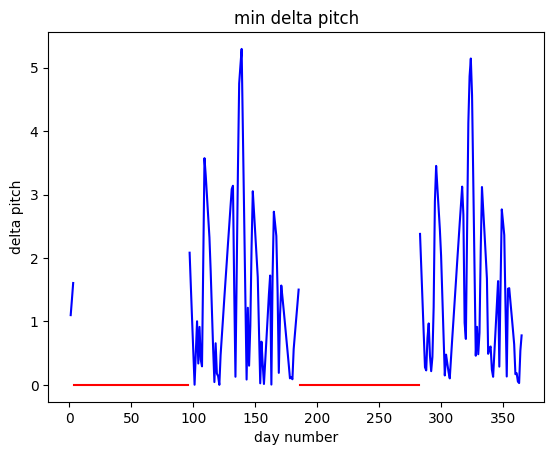

In [ ]:
# plot min pitch vs day number line plot (w/ solar angle consideration)

output_sol = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs_solang.csv")
output = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs.csv")
tgt = pd.read_csv(cwd + "\\csv (for reference)\\" + "tgt_data.csv")
tgt_p = tgt["47 UMa c pitch"]
tgt_s = tgt["sun angle"]
minp = []
min_ind = []
ndays = 365
for n in range(ndays):  # loop thru each day
    deltas = []
    delta_inds = []
    if tgt_s[n] < 54 or tgt_s[n] > 126:
        minp.append(0)
        min_ind.append("NaN")
        continue
    for m in range(
        len(output.columns)
    ):  # loop thru each reference star to check solar angle and calculate delta pitch
        sol_ang = output_sol[output_sol.columns[m]][n]
        if (
            sol_ang >= 54 and sol_ang <= 126
        ):  # check if pitch has solar angle within constraints
            cur_delta = abs(
                output[output.columns[m]][n] - tgt_p[n]
            )  # calculate delta pitch
            deltas.append(cur_delta)
            delta_inds.append(m)
    mindelt = min(deltas)
    minp.append(mindelt)
    min_ind.append(output.columns.to_list()[delta_inds[deltas.index(mindelt)]][2:])
print("min pitch: ", minp)
print("min pitch reference: ", min_ind)
days_val = []
days = np.arange(1, ndays + 1, 1)
minpval = []
# break up data into invalid and valid days based on tgt solar angle and plot delta pitch vs day number
if inv_ends[0] != 0:
    days_val.extend(days[0 : inv_ends[0]])
    minpval.extend(minp[0 : inv_ends[0]])
    plt.plot(days_val, minpval, "b")
for l in range(1, len(inv_ends) - 1, 2):
    days_val.extend(days[inv_ends[l] + 1 : inv_ends[l + 1]])
    minpval.extend(minp[inv_ends[l] + 1 : inv_ends[l + 1]])
    plt.plot(
        days[inv_ends[l] + 1 : inv_ends[l + 1]],
        minp[inv_ends[l] + 1 : inv_ends[l + 1]],
        "b",
    )
if inv_ends[len(inv_ends) - 1] != ndays - 1:
    days_val.extend(days[inv_ends[len(inv_ends) - 1] + 1 : ndays])
    minpval.extend(minp[inv_ends[len(inv_ends) - 1] + 1 : ndays])
    plt.plot(
        days[inv_ends[len(inv_ends) - 1] + 1 : ndays],
        minp[inv_ends[len(inv_ends) - 1] + 1 : ndays],
        "b",
    )
print(days_val)
for l in range(0, len(inv_ends), 2):
    plt.plot(
        [inv_ends[l] + 1, inv_ends[l + 1] + 1], [0, 0], "r-"
    )  # plot invalid days in red line as 0 delta pitch
title = "min delta pitch"
plt.title(title)
plt.xlabel("day number")
plt.ylabel("delta pitch")
plt.show()

min pitch:  [1.1003076035624488, 1.3492295445750315, 1.606790949359329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.084477212951228, 1.5500154950971776, 1.025729100681815, 0.5114418497250952, 0.0030254597105283665, 0.5078542230562455, 1.0032272284476846, 0.33749949919776867, 0.9147622067692964, 0.39620375226564164, 0.2928614240071177, 1.93532718485179, 3.5749172268067184, 3.3045479623115384, 2.979588018414379, 2.649320563638142, 2.3235949949460277, 1.7930487534284723, 1.174692572342238, 0.5619938926049564, 0.045127755195707664, 0.6567541708495206, 0.17973924369146488, 0.1383001379701767, 0.0014169196446474075, 0.4677912953562906, 0.766116760376244, 1.0614810778750563, 1.3640230434372533, 1.6538810983249963, 1.941193079775914, 2.236095688891938, 2.518723

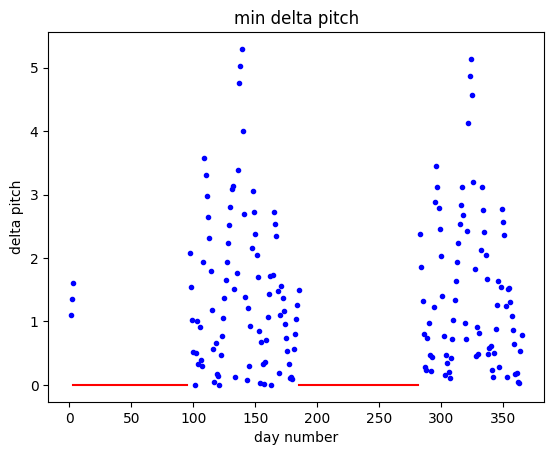

In [12]:
# plot min pitch vs day number scatter plot (w/ solar angle consideration)

output_sol = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs_solang.csv")
output = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs.csv")
tgt = pd.read_csv(cwd + "\\csv (for reference)\\" + "tgt_data.csv")
tgt_p = tgt["47 UMa c pitch"]
tgt_s = tgt["sun angle"]
minp = []
min_ind = []
ndays = 365
for n in range(ndays):  # loop thru each day
    deltas = []
    delta_inds = []
    if tgt_s[n] < 54 or tgt_s[n] > 126:
        minp.append(0)
        min_ind.append("NaN")
        continue
    for m in range(len(output.columns)):  # loop thru each reference star
        sol_ang = output_sol[output_sol.columns[m]][n]
        if sol_ang >= 54 and sol_ang <= 126:
            cur_delta = abs(output[output.columns[m]][n] - tgt_p[n])
            deltas.append(cur_delta)
            delta_inds.append(m)
        # else:
        #     # print("date ", n, ", sol_ang: ", sol_ang)
    mindelt = min(deltas)
    minp.append(mindelt)
    min_ind.append(output.columns.to_list()[delta_inds[deltas.index(mindelt)]][2:])
print("min pitch: ", minp)
print("min pitch reference: ", min_ind)
for p in range(ndays):
    if minp[p] != 0:
        plt.plot(p + 1, minp[p], "b.")
# plt.plot(np.arange(1,ndays+1,1), minp)
for l in range(0, len(inv_ends), 2):
    plt.plot([inv_ends[l], inv_ends[l + 1]], [0, 0], "r-")
title = "min delta pitch"
plt.title(title)
plt.xlabel("day number")
plt.ylabel("delta pitch")
plt.show()

min pitch:  [69.17080240575137, 69.53275706865983, 69.6250816803037, 54.27836055519658, 55.48101097711137, 56.668707303094045, 57.851292116359076, 59.01860729169655, 55.075333550065906, 56.19395097814624, 57.29825645486952, 54.19048344904384, 55.91392338898682, 57.617002825152284, 59.31968425038927, 61.00193182227833, 62.683711956655515, 64.35499406787257, 65.64222574488568, 66.62205550518547, 54.91504640169268, 55.895119992674196, 56.85328339916424, 57.79944396503059, 58.73350854120684, 59.64538256733359, 60.544969555187485, 54.23629337734354, 55.392283203296564, 56.52776633901354, 57.65261343716941, 58.74669320938143, 59.829872660894324, 60.88201722936252, 60.774570454568234, 54.75295458210125, 55.812175575279646, 56.84133071656975, 57.84028816793967, 57.411585581465545, 56.67000733077439, 55.88883557883594, 55.08809739600807, 54.25781807996383, 54.65419462187826, 54.455324767292744, 55.542974512675066, 56.46914663522595, 55.57530049197844, 54.66207732473284, 59.61875034560455, 60.55

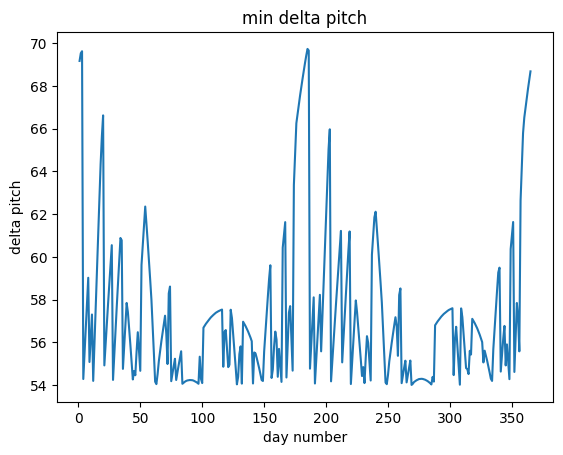

In [13]:
# plot min pitch vs day number (all days w/ sun angle consideration)

output_sol = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs_solang.csv")
output = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs.csv")
tgt = pd.read_csv(cwd + "\\csv (for reference)\\" + "tgt_data.csv")
tgt_p = tgt["47 UMa c pitch"]
minp = []
min_ind = []
ndays = 365
for n in range(ndays):  # loop thru each day
    deltas = []
    delta_inds = []
    if tgt_p[n] < 54 and tgt_p[n] > 126:
        minp.append(0)
        min_ind.append("NaN")
        continue
    for m in range(len(output.columns)):  # loop thru each reference star
        cur_delta = abs(output[output.columns[m]][n] - tgt_p[n])
        if cur_delta >= 54 and cur_delta <= 126:
            deltas.append(cur_delta)
            delta_inds.append(m)
    mindelt = min(deltas)
    minp.append(mindelt)
    min_ind.append(output.columns.to_list()[delta_inds[deltas.index(mindelt)]][2:])
print("min pitch: ", minp)
print("min pitch reference: ", min_ind)
plt.plot(np.arange(1, ndays + 1, 1), minp)
title = "min delta pitch"
plt.title(title)
plt.xlabel("day number")
plt.ylabel("delta pitch")
plt.show()

In [ ]:
# plot delta pitch vs day number for each reference star in separate graph (w/o solar angle constraint)
ndays = 365
output_sol = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs_solang.csv")
output = pd.read_csv(cwd + "\\csv (for reference)\\" + "output_refs.csv")
tgt = pd.read_csv(cwd + "\\csv (for reference)\\" + "tgt_data.csv")
tgt_p = tgt[tgt.columns[1]]
for n in range(len(output.columns)):  # len(output.columns)
    plt.figure
    deltas = []
    for m in range(len(output[output.columns[0]])):
        deltas.append(abs(output[output.columns[n]][m] - tgt_p[m]))
    plt.plot(np.arange(1, ndays + 1, 1), deltas)
    title = "delta pitch: " + str(output.columns[n][2:])
    plt.title(title)
    plt.xlabel("day number")
    plt.ylabel("delta pitch angle")
    plt.show()